# California Housing

=======================================================
Import Required Libraries

In [374]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score

=======================================================
Load the data

In [375]:
print("Current Working Directory " , os.getcwd())

Current Working Directory  /Users/sethip/Work/PGDS/data-sciences/Code/Python


In [376]:
housing_df = pd.read_excel(r"../../DataSets/RealEstate/California_Housing.xlsx")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [377]:
housing_df.shape

(20640, 10)

In [378]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [379]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


=======================================================
Data Cleaning - Handle missing values

In [380]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [381]:
housing_df.total_bedrooms.mean()

537.8705525375618

In [382]:
housing_df.total_bedrooms.fillna(housing_df.total_bedrooms.mean(),inplace=True)
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

=======================================================
Encode categorical data

In [383]:
housing_df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [384]:
lbl_encoder = LabelEncoder()
housing_df.loc[:, ('ocean_proximity')] = lbl_encoder.fit_transform(housing_df['ocean_proximity'])
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


=======================================================
Exploratory Data Analysis - EDA

In [385]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,1.165843,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.266592,1132.462122,382.329753,1.899822,1.420662,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,0.000000,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,0.000000,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,438.000000,1166.000000,409.000000,3.534800,1.000000,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,1.000000,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,4.000000,500001.000000


In [386]:
housing_df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

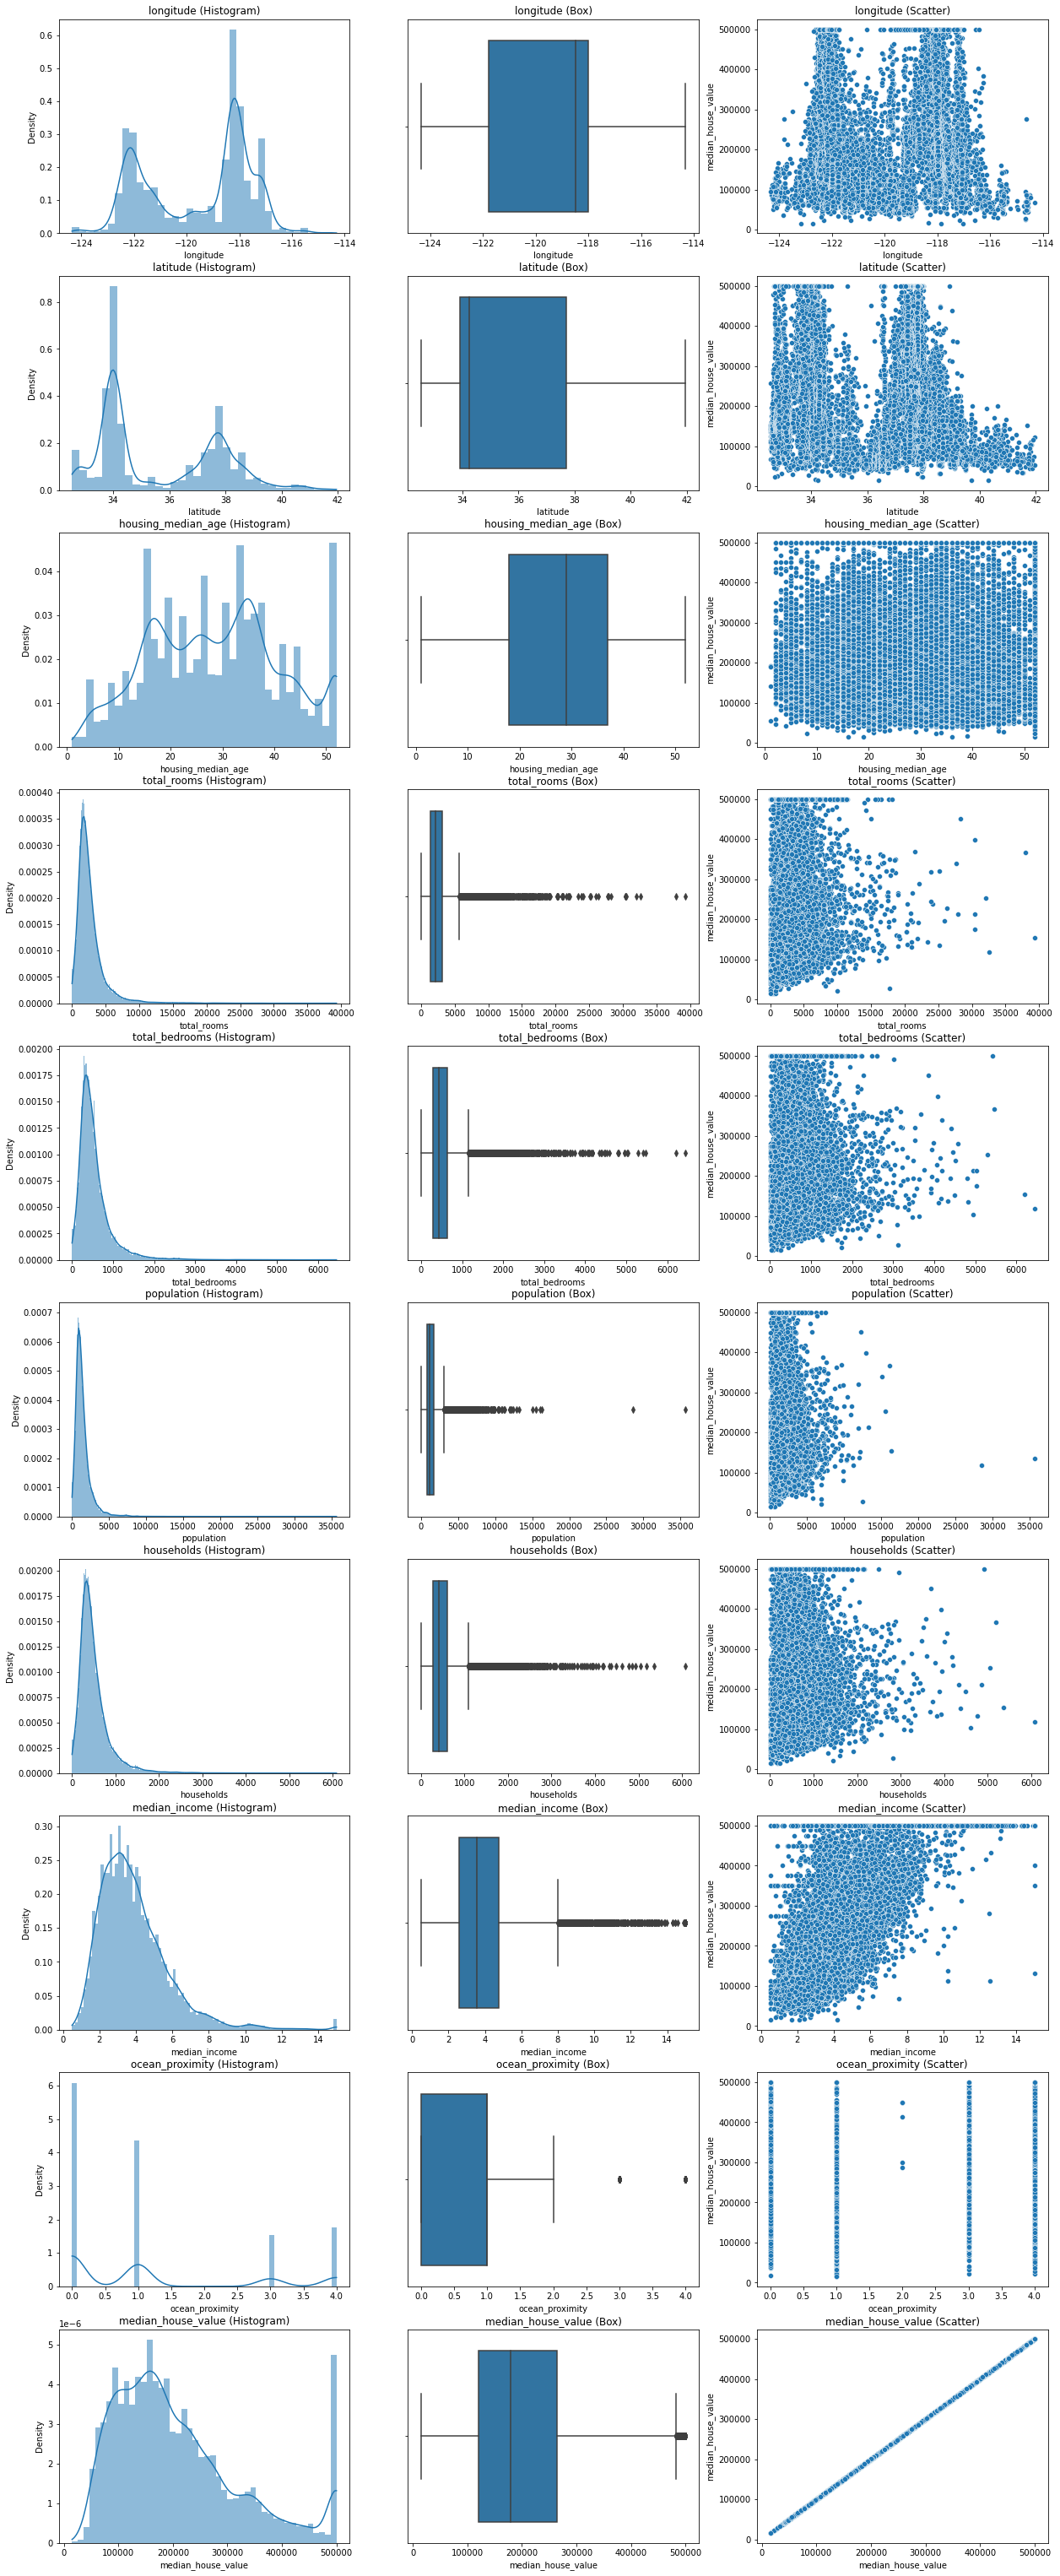

In [387]:
rows = 10  # number of rows
cols = 3  # number of columns
curr_plt_number = 1  # initialize plot counter

fig, axes = plt.subplots(figsize=(21,55))
for i, c in enumerate(housing_df.columns):
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Histogram)'.format(c))
    plt.xlabel(c)
    sns.histplot(x = c, data=housing_df, kde=True, stat="density", linewidth=0)
    curr_plt_number = curr_plt_number + 1
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Box)'.format(c))
    plt.xlabel(c)
    sns.boxplot(x = housing_df[c])
    curr_plt_number = curr_plt_number + 1
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Scatter)'.format(c))
    plt.xlabel(c)
    sns.scatterplot(x=c, y='median_house_value', data=housing_df)
    curr_plt_number = curr_plt_number + 1
    
plt.show()

The above plots shows the distribution (histogram), outliers (box plot)  and relationship of each variable with median house value (scatter plot).
Clearly, only one independent variable i.e. median income shows linear relationship with median house value. All the other independent variables do not show any significant correlation visually.

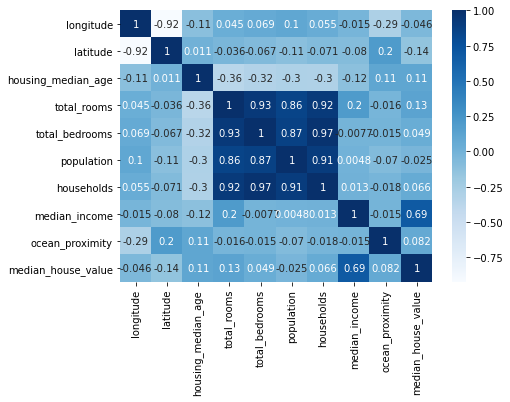

In [388]:
plt.figure(figsize=(7,5))
cor = housing_df.corr()
sns.heatmap(cor, annot=True, cmap=pyplot.cm.Blues)
plt.show()

Median_Income has highest correlation with Median House Value i.e. ~0.69

=======================================================
Split the dataset

In [389]:
feature_cols = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population',
               'households', 'median_income', 'ocean_proximity']
X = housing_df[feature_cols]
y = housing_df.median_house_value
X.shape, y.shape

((20640, 9), (20640,))

In [390]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 9), (4128, 9), (16512,), (4128,))

=======================================================
Standardize data

In [391]:
std_scaler = StandardScaler()
X_train_std_data = std_scaler.fit_transform(X_train)
X_train_std_data

array([[ 1.52346202, -0.85071881, -0.60284716, ...,  3.25521943,
        -0.70962463, -0.1134989 ],
       [-1.6764423 ,  1.33721733,  1.37738127, ..., -0.35127535,
        -0.65125171, -0.81884098],
       [-1.45214994,  0.93048561,  0.18924421, ...,  0.31307895,
         0.68297151,  2.00252732],
       ...,
       [-1.10325072,  0.78555822, -1.79098421, ...,  0.21553487,
         0.88315258, -0.81884098],
       [ 0.67115105, -0.77591757,  0.50608076, ..., -0.00591657,
        -0.87633644, -0.81884098],
       [-1.14810919,  0.77620806, -0.99889284, ...,  0.47916753,
        -0.62761702, -0.81884098]])

In [392]:
X_train_std_df = pd.DataFrame(X_train_std_data, columns=feature_cols)
X_train_std_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,1.523462,-0.850719,-0.602847,3.523431,4.268534,1.933739,3.255219,-0.709625,-0.113499
1,-1.676442,1.337217,1.377381,-0.162457,-0.109580,-0.544768,-0.351275,-0.651252,-0.818841
2,-1.452150,0.930486,0.189244,0.222041,0.200226,0.040533,0.313079,0.682972,2.002527
3,0.730962,-0.738517,-0.998893,-0.099379,0.065737,0.285215,0.038901,-0.550104,-0.818841
4,-0.540028,-0.238284,0.981336,0.016574,0.512434,-0.427708,0.020447,-1.003551,-0.818841


In [393]:
X_train_std_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,3.342395e-15,1.456926e-15,2.056790e-17,3.634178e-18,-2.268722e-16,-6.575140e-17,-9.614940e-18,1.344747e-20,-2.624811e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.379225e+00,-1.449129e+00,-2.187030e+00,-1.219013e+00,-1.288765e+00,-1.252410e+00,-1.313535e+00,-1.778367e+00,-8.188410e-01
25%,-1.108235e+00,-7.992930e-01,-8.404746e-01,-5.478816e-01,-5.778916e-01,-5.641313e-01,-5.806358e-01,-6.895325e-01,-8.188410e-01
50%,5.365756e-01,-6.450154e-01,3.082594e-02,-2.343469e-01,-2.392662e-01,-2.292337e-01,-2.379133e-01,-1.749360e-01,-1.134989e-01
75%,7.808051e-01,9.725613e-01,6.644990e-01,2.374625e-01,2.530615e-01,2.676118e-01,2.814430e-01,4.633857e-01,-1.134989e-01
max,2.624987e+00,2.950119e+00,1.852636e+00,1.701702e+01,1.418714e+01,3.015051e+01,1.471797e+01,5.888472e+00,2.002527e+00


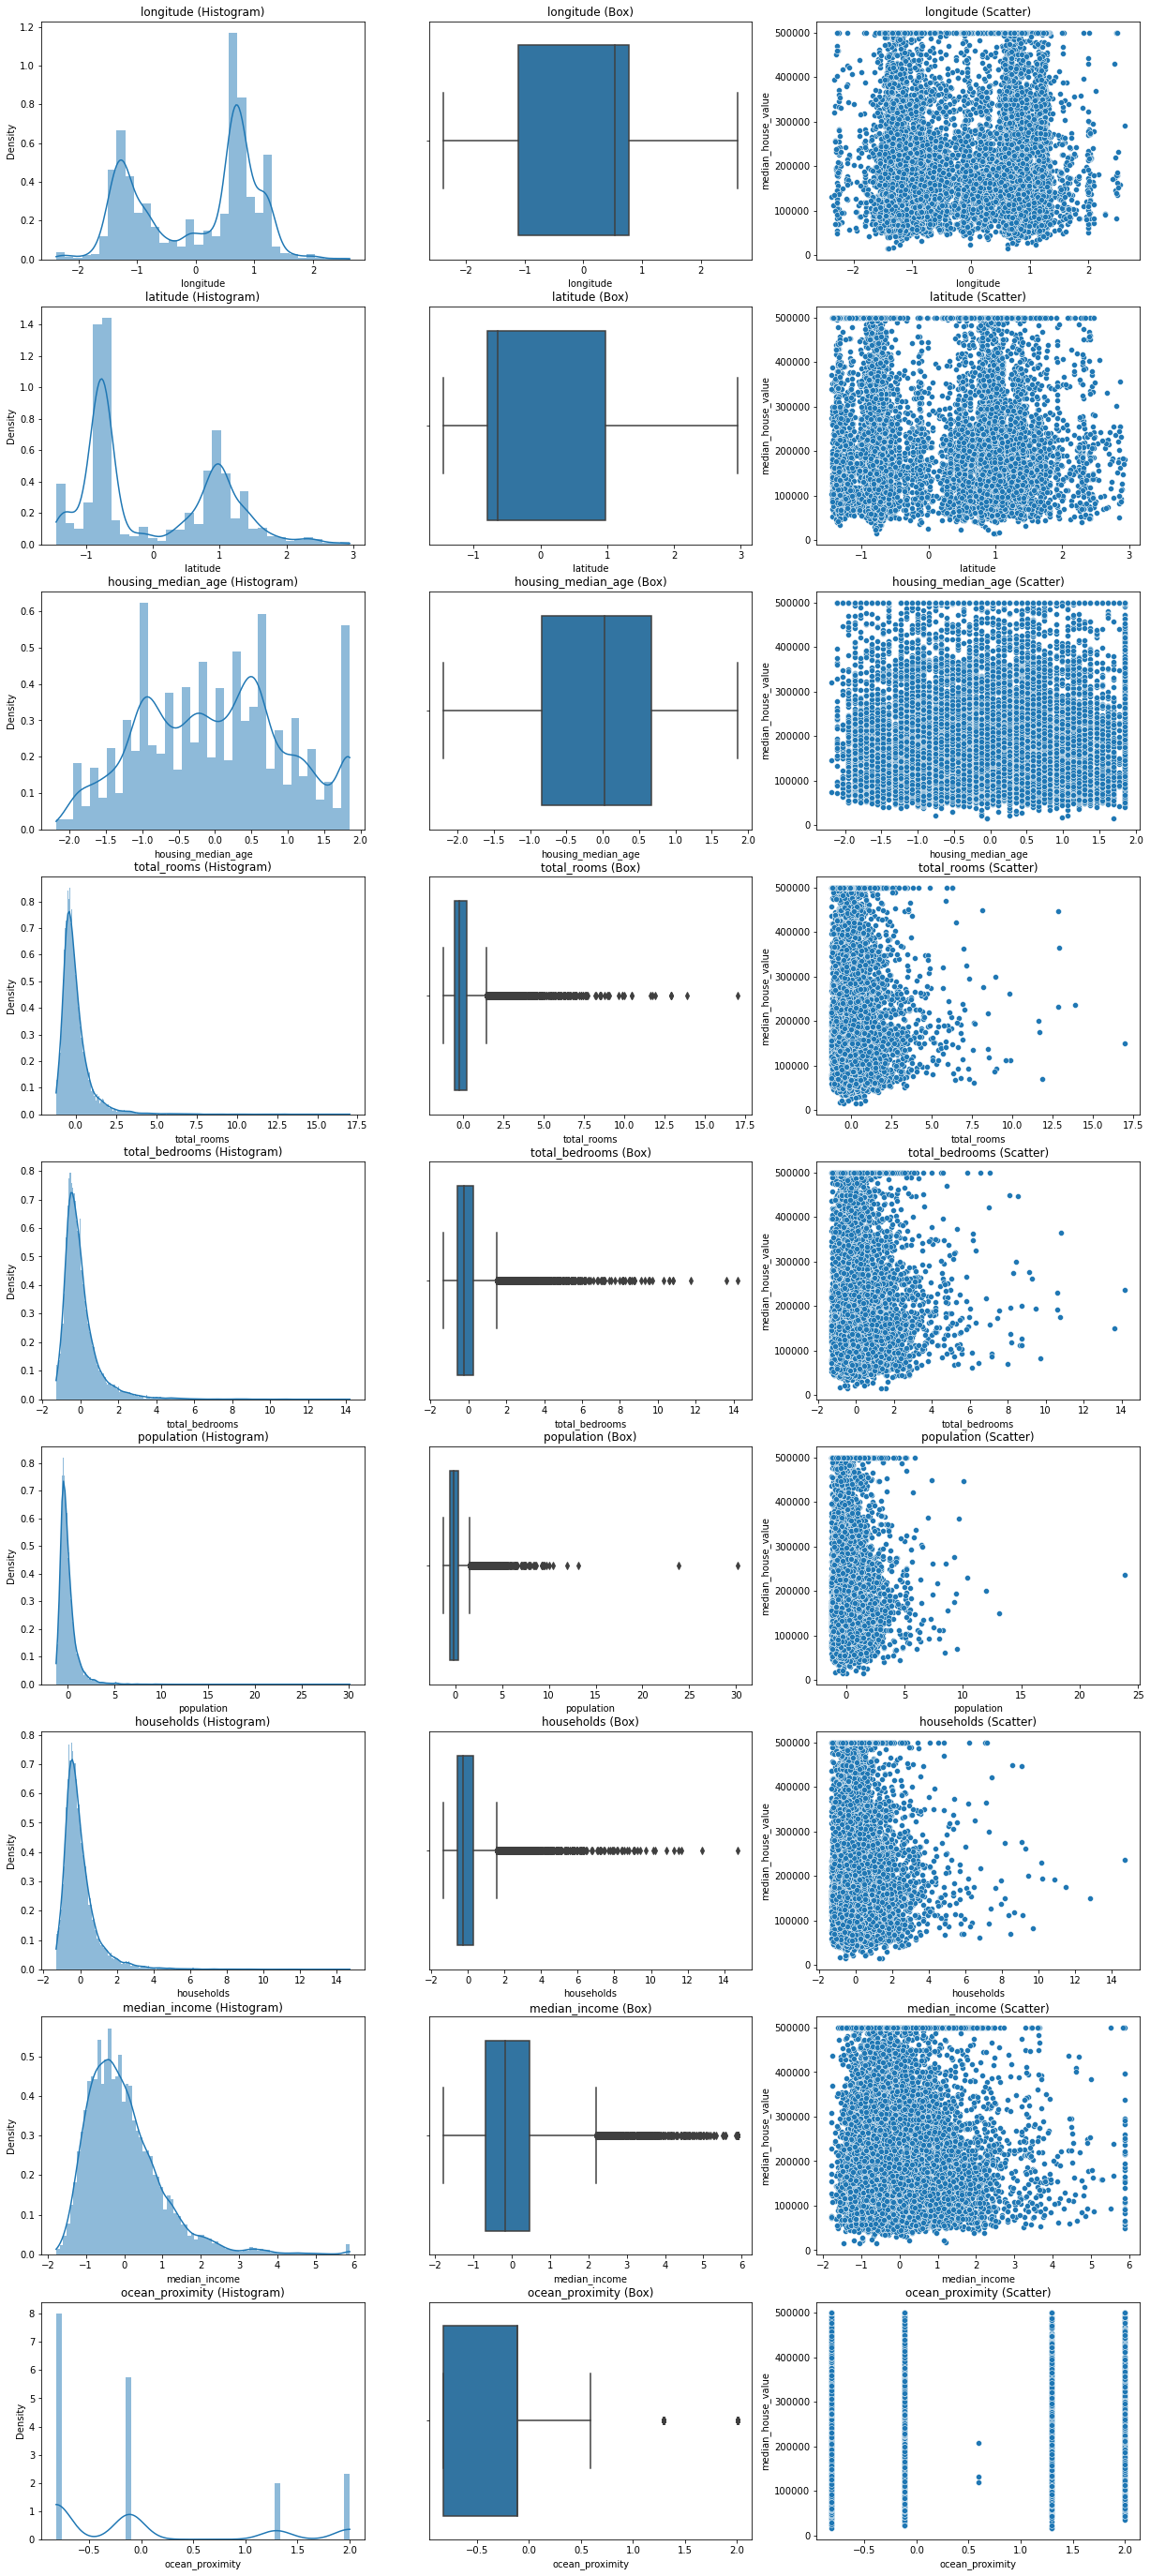

In [394]:
rows = 10  # number of rows
cols = 3  # number of columns
curr_plt_number = 1  # initialize plot counter

fig, axes = plt.subplots(figsize=(21,55))
for i, c in enumerate(X_train_std_df.columns):
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Histogram)'.format(c))
    plt.xlabel(c)
    sns.histplot(x = c, data=X_train_std_df, kde=True, stat="density", linewidth=0)
    curr_plt_number = curr_plt_number + 1
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Box)'.format(c))
    plt.xlabel(c)
    sns.boxplot(x = X_train_std_df[c])
    curr_plt_number = curr_plt_number + 1
    
    plt.subplot(rows, cols, curr_plt_number)
    plt.title('{} (Scatter)'.format(c))
    plt.xlabel(c)
    sns.scatterplot(x=c, y=y_train, data=X_train_std_df)
    curr_plt_number = curr_plt_number + 1
    
plt.show()

x axes of all the independent variables are normalized to a smaller value with standard deviation = 0

In [395]:
X_test_std_data = std_scaler.fit_transform(X_test)
X_test_std_data

array([[ 0.18192367, -0.67849302, -1.34840706, ..., -1.00916727,
         0.71293818,  1.96551927],
       [-1.38943917,  0.9181829 , -0.14117516, ...,  0.88878716,
         0.03727867,  1.96551927],
       [ 0.88979   , -0.90928099, -1.34840706, ...,  1.21103343,
         0.31517798, -0.82796103],
       ...,
       [-1.40450016,  1.12071111,  0.34171759, ..., -0.18705867,
         0.03991695,  1.26714919],
       [ 0.63375324, -0.76327227,  1.30750311, ..., -0.34437575,
        -1.53456991, -0.82796103],
       [ 0.67391587, -0.65494323,  0.90509248, ..., -0.70214523,
         2.03683973, -0.82796103]])

In [396]:
X_test_std_df = pd.DataFrame(X_test_std_data, columns=feature_cols)
X_test_std_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,0.181924,-0.678493,-1.348407,-0.963678,-1.016976,-0.911594,-1.009167,0.712938,1.965519
1,-1.389439,0.918183,-0.141175,0.558299,0.915514,0.405780,0.888787,0.037279,1.965519
2,0.889790,-0.909281,-1.348407,0.732816,1.229079,0.437998,1.211033,0.315178,-0.827961
3,0.799424,-0.702043,0.019789,-0.294552,-0.210997,0.527494,-0.174372,-0.412161,-0.129591
4,-0.164479,0.569646,-1.831300,-0.336208,-0.459527,-0.406839,-0.433184,0.399603,-0.129591


=======================================================
Perform Linear Regression

In [397]:
model = LinearRegression()
model.fit(X_train_std_df, y_train)
model.coef_, model.intercept_

(array([-86326.82335119, -91604.53126481,  14489.19678421, -14713.04226299,
         35310.92002278, -42005.98159052,  26492.99501664,  75340.55534214,
           189.27204441]),
 206456.04790455467)

In [398]:
y_preds = model.predict(X_test_std_df)
y_preds

array([277276.85935473, 274042.11327777, 263292.51733716, ...,
       224484.69902236, 113252.77410742, 368833.51164807])

In [399]:
r2_score(y_test,y_preds), np.sqrt(mean_squared_error(y_test,y_preds))

(0.6350907607635344, 70564.65246891978)

R2 = 0.64. This implies that 64% of the variability of the dependent variable in the data set has been accounted for, and the remaining 36% of the variability is still unaccounted for.
An R2 of 1 indicates that the regression predictions perfectly fit the data.
Values of R2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. This would occur when the wrong model was chosen.

MSE = 70564.65. The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value with the error decreasing as the error approaches zero.

======================================================= Perform Linear Regression with one independent variable

In [400]:
housing_df[['median_income', 'median_house_value']].corr()

,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


In [401]:
X_train = X_train_std_df.median_income.values
X_test = X_test_std_df.median_income.values
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512,), (4128,), (16512,), (4128,))

In [402]:
type(X_train), type(y_train)

(numpy.ndarray, pandas.core.series.Series)

In [403]:
X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 1), (4128, 1), (16512,), (4128,))

In [404]:
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_, model.intercept_

(array([79071.73119386]), 206456.04790455426)

In [405]:
y_preds = model.predict(X_test)
r2_score(y_test, y_preds), np.sqrt(mean_squared_error(y_test, y_preds))

(0.4764956581254305, 84519.11116829688)

R2 = 0.47. This implies that 47% of the variability of the dependent variable in the data set has been accounted for, and the remaining 53% of the variability is still unaccounted for.
An R2 of 1 indicates that the regression predictions perfectly fit the data.
Values of R2 outside the range 0 to 1 can occur when the model fits the data worse than a horizontal hyperplane. This would occur when the wrong model was chosen.

MSE = 84519.11. The MSE is a measure of the quality of an estimator. As it is derived from the square of Euclidean distance, it is always a positive value with the error decreasing as the error approaches zero.

Linean Regression Model 1 with all independent variables is better to predict median_house_value than the model with single independent variable 'median_income'!

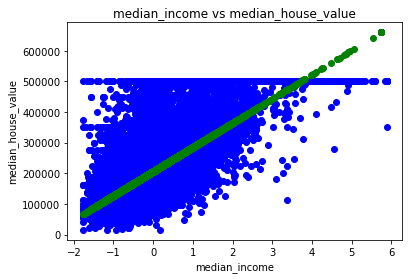

In [406]:
plt.scatter(X_train, y_train, color = "blue")
plt.scatter(X_test, y_preds, color = "green")
plt.title("median_income vs median_house_value")
plt.xlabel("median_income")
plt.ylabel("median_house_value")
plt.show()

The End